In [20]:
#import required models
from sklearn.ensemble import StackingClassifier,VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn import model_selection

import pandas as pd

#ignore warnings
import warnings
warnings.simplefilter('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [3]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima = pd.read_csv('pima-indians-diabetes.data',header=None,names=colnames)

#print first 5 records
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
# predictors/independent variables
X = pima.iloc[:,:-1]

# target/dependent variable
y = pima.iloc[:,-1]

# shape of preditors & target variable
X.shape,y.shape

((768, 8), (768,))

In [5]:
# split data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)

In [16]:
# DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X,y)

# features that are contributing more to predict target
dt.feature_importances_
for i,j in enumerate(dt.feature_importances_):
    print(X.columns[i],'->',j)

preg -> 0.09123496884434568
plas -> 0.233269990687806
pres -> 0.08962301413475222
skin -> 0.02382515523386837
test -> 0.04380327779090498
mass -> 0.26730879638782606
pedi -> 0.13019577969538573
age -> 0.12073901722511095


In [6]:
# scaling the data with StandardScaler / z-score
sc=StandardScaler()
# sc = RobustScaler()
sc.fit(X_train)
sc_train = sc.transform(X_train)
sc_test = sc.transform(X_test)

In [7]:
# DecisionTree model
dt = DecisionTreeClassifier(criterion='entropy',random_state=14)
dt.fit(sc_train,y_train)
print("DT Train Score",dt.score(sc_train,y_train))
print("DT Test Score",dt.score(sc_test,y_test))
print('DT Precision',precision_score(y_test,dt.predict(sc_test),average=None)) # precision for both the classes(0 & 1)
# print(classification_report(y_test,dt.predict(sc_test)))

# LogisticRegression model
lr = LogisticRegression(random_state=14)
lr.fit(sc_train,y_train)
print("\nLR Train Score",lr.score(sc_train,y_train))
print("LR Test Score",lr.score(sc_test,y_test))
print('LR Precision',precision_score(y_test,lr.predict(sc_test),average=None))

# KNeighbor model
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(sc_train,y_train)
print("\nknn Train Score",knn.score(sc_train,y_train))
print("knn Test Score",knn.score(sc_test,y_test))
print('knn Precision',precision_score(y_test,knn.predict(sc_test),average=None))

DT Train Score 1.0
DT Test Score 0.7207792207792207
DT Precision [0.75 0.66]

LR Train Score 0.7736156351791531
LR Test Score 0.7662337662337663
LR Precision [0.75213675 0.81081081]

knn Train Score 0.7638436482084691
knn Test Score 0.7402597402597403
knn Precision [0.70992366 0.91304348]


**Hard voting**<br>
 The output class is a class with the highest majority of votes.
 Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output.
 Hence A will be the final prediction.

In [11]:
# VotingClassifier model with hard voting
vc = VotingClassifier(estimators=[('dt',dt),('lr',lr),('knn',knn)],voting='hard')
vc.fit(sc_train,y_train)
print("vc Train Score",vc.score(sc_train,y_train))
print("vc Test Score",vc.score(sc_test,y_test))
print('vc Precision',precision_score(y_test,vc.predict(sc_test),average=None))
print('vc Recall',recall_score(y_test,vc.predict(sc_test),average=None))

vc Train Score 0.8143322475570033
vc Test Score 0.7792207792207793
vc Precision [0.75206612 0.87878788]
vc Recall [0.95789474 0.49152542]


**Soft Voting**<br>
The output class is predicted based on the average of probability given to that class. 
Suppose the prediction probabilities of 2 classes are, class A = (0.48, 0.56, 0.53) and B = (0.33, 0.48, 0.40). So the average for class A is 0.523 and B is 0.403, the winner is class A because it has the highest probability averaged by each classifier.

In [12]:
# VotingClassifier model with soft voting 
vc = VotingClassifier(estimators=[('dt',dt),('lr',lr),('knn',knn)],voting='soft')
vc.fit(sc_train,y_train)
print("vc Train Score",vc.score(sc_train,y_train))
print("vc Test Score",vc.score(sc_test,y_test))
print('vc Precision',precision_score(y_test,vc.predict(sc_test),average=None))

vc Train Score 0.9381107491856677
vc Test Score 0.7467532467532467
vc Precision [0.75454545 0.72727273]


In [17]:
vc = StackingClassifier(estimators=[('dt',dt),('lr',lr),('knn',knn)],passthrough=False)
vc.fit(sc_train,y_train)
print("vc Train Score",vc.score(sc_train,y_train))
print("vc Test Score",vc.score(sc_test,y_test))
print('vc Precision',precision_score(y_test,vc.predict(sc_test),average=None))
print('vc Recall',recall_score(y_test,vc.predict(sc_test),average=None))

vc Train Score 0.8289902280130294
vc Test Score 0.7792207792207793
vc Precision [0.76068376 0.83783784]
vc Recall [0.93684211 0.52542373]


In [18]:
print('3-fold cross validation:\n')

for clf, label in zip([dt, lr, knn,vc], 
                      ['DecisionTree', 
                       'LogisticRegression', 
                       'KNN',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.667 (+/- 0.03) [DecisionTree]
Accuracy: 0.770 (+/- 0.03) [LogisticRegression]
Accuracy: 0.740 (+/- 0.02) [KNN]
Accuracy: 0.771 (+/- 0.03) [StackingClassifier]


In [21]:
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=14)
clf2 = LogisticRegression(random_state=14)
clf3 = KNeighborsClassifier(n_neighbors=49)
# lr = KNeighborsClassifier(n_neighbors=49)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr,average_probas=True)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['DecisionTree', 
                       'LogisticRegression', 
                       'KNN',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.70 (+/- 0.01) [DecisionTree]
Accuracy: 0.77 (+/- 0.02) [LogisticRegression]
Accuracy: 0.73 (+/- 0.00) [KNN]
Accuracy: 0.70 (+/- 0.01) [StackingClassifier]


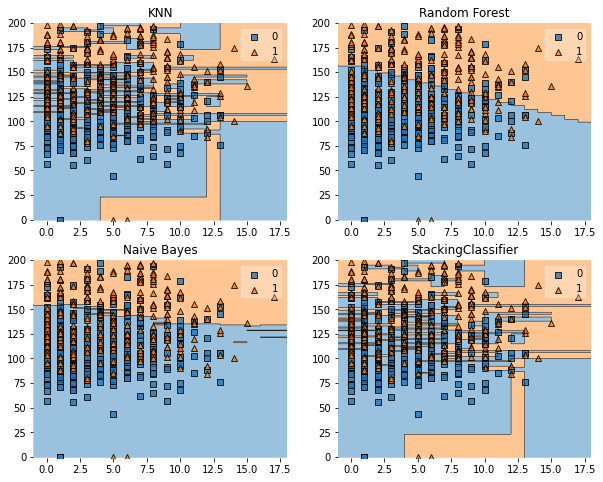

In [51]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# sc=StandardScaler()
# sc = RobustScaler()

# sc.fit(X[:,2])
# sc_train = sc.transform(X)
# sc_test = sc.transform(y)

X = X[:,:2]
# print(y)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y.values, clf=clf)
    plt.title(lab)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200,500]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200, 500]})

In [53]:
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 500}


In [58]:
print(rf_gs.score(X_train, y_train))
print(rf_gs.score(X_test, y_test))

1.0
0.7597402597402597
